## Importing basic libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Importing dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X = dataset.iloc[:,3:-1]
y= dataset.iloc[:,-1:]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## One hot encoding the string input features

In [ ]:
#Encoding the string Text
print(X['Geography'].unique())
print(X['Gender'].unique())

In [8]:
Geoencoder = OneHotEncoder()
Genderencoder = OneHotEncoder()

In [9]:
Geofeatures = Geoencoder.fit_transform(X[['Geography']]).toarray()
Genderfeatures = Genderencoder.fit_transform(X[['Gender']]).toarray()

In [10]:
print(Geofeatures,Genderfeatures)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [11]:
Geofeatures_labels = Geoencoder.categories_
Genderfeatures_labels = Genderencoder.categories_
print(Geofeatures_labels,Genderfeatures_labels)

[array(['France', 'Germany', 'Spain'], dtype=object)] [array(['Female', 'Male'], dtype=object)]


In [12]:
Geofeatures_labels = np.array(Geofeatures_labels).ravel()
Genderfeatures_labels = np.array(Genderfeatures_labels).ravel()

In [13]:
GeoData = pd.DataFrame(Geofeatures,columns=Geofeatures_labels)
GenderData = pd.DataFrame(Genderfeatures,columns=Genderfeatures_labels)

## Creating The final dataset after preprocessing

In [14]:
#Creating the Dataset
X.drop(['Gender','Geography'],axis=1,inplace=True)
X = pd.concat([X,GeoData,GenderData],axis=1,join='inner')

In [15]:
y=np.array(y).ravel()

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


## Train-test split to divide into training and testing dataset

In [17]:
#Train-CV-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating normalizer to normalize the dataset

In [18]:
#Creating normalizer:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.39456136,  0.11151309, -1.04397451, ...,  1.72155741,
        -0.91607929,  0.91607929],
       [ 0.601425  , -1.52313312,  1.03614929, ..., -0.58086939,
        -0.91607929,  0.91607929],
       [-0.12259773, -0.36926521, -1.39066181, ..., -0.58086939,
         1.09160857, -1.09160857],
       ...,
       [-0.99142501, -0.56157653, -0.00391261, ...,  1.72155741,
        -0.91607929,  0.91607929],
       [-0.09156819, -0.27310955,  0.34277469, ...,  1.72155741,
         1.09160857, -1.09160857],
       [ 0.72554318,  1.45769233, -0.00391261, ..., -0.58086939,
        -0.91607929,  0.91607929]])

In [19]:
#Shape of Training data
print(X_train.shape,y_train.shape)

(7000, 13) (7000,)


## Creating the Random forest Classifier
## Here, max_depth and n_estimators are hyperparameters

In [20]:
#Creating the model:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4,n_estimators=50)

## Training the model

In [21]:
#Training the model:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

## Calculating the training accuracy

In [22]:
#Testing the model for training accuracy:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_train_pred = model.predict(X_train)
print(f'Accuracy of the training set is: {accuracy_score(y_train,y_train_pred) *100}%')

Accuracy of the training set is: 83.95714285714286%


In [23]:
#Testing the accuracy of the model in test set:
y_pred_test = model.predict(X_test)

## Calculating the test accuracy

In [25]:
#Accuracy score:
print(f'The accuracy of the test set is: {accuracy_score(y_test,y_pred_test)*100}%')

The accuracy of the test set is: 83.39999999999999%


## Confusion matrix

In [26]:
# Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[2358,   24],
       [ 474,  144]])

## Plotting the confusion matrix to evaluate which label is being misclassified

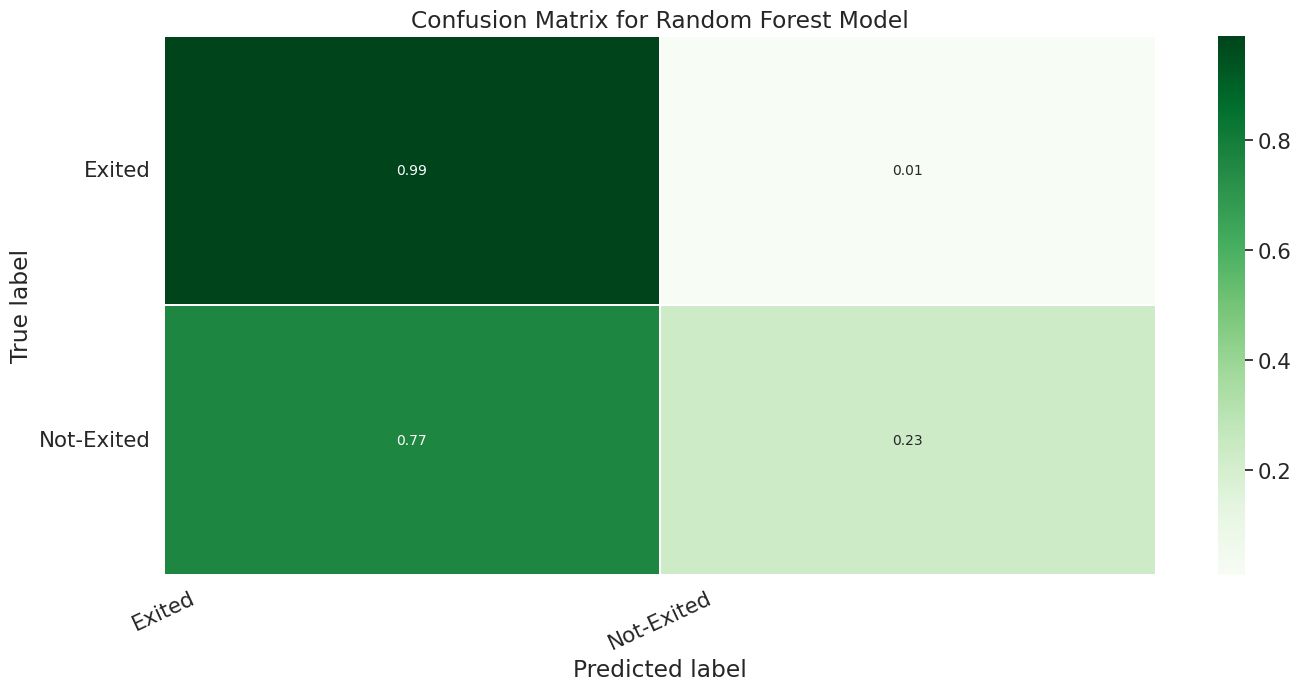

In [30]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Exited','Not-Exited']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## We can clearly see in which case the model is misevaluating and can accordingly improve our model